In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta

In [2]:
sns.set()

## Question 1
1 Point
Load the data and rearrange it as a pandas DataFrame with the following structure:

One column per stock and concept: Open, High, Low, Close, Volume
Date as index (properly parsed)
Rows sorted by date, ascending
Be ready for dealing with errors in the names and some missing values.

Paste here the `.dtypes` of the resulting DataFrame.

In [3]:
df = pd.read_csv("../data/stocks_unclean.csv", parse_dates=["date"], dayfirst=True, index_col=["date"])
df.head()

,variable,value
date,,
2020-07-14,high_AAPL,9.725500e+01
2021-10-22,volume_AMZN,3.139100e+06
2021-06-04,volume_MSFT,2.528110e+07
2021-06-28,volume_AMZN,2.242800e+06
2021-11-23,low_GOOG,NaN


,variable,value
date,,
2020-07-14,high_AAPL,9.725500e+01
2021-10-22,volume_AMZN,3.139100e+06
2021-06-04,volume_MSFT,2.528110e+07
2021-06-28,volume_AMZN,2.242800e+06
2021-11-23,low_GOOG,NaN


In [4]:
df=df[df["variable"].notna()]

In [5]:
x=df["variable"].str.extract("([\w -]+)_([\w -]+)")

In [6]:
df["metrics"]=x[0]
df["symbols"]=x[1]

In [7]:
df["symbols"].unique()

array(['AAPL', 'AMZN', 'MSFT', 'GOOG', 'APL', 'GOG', 'MST', 'AMZ'],
      dtype=object)

array(['AAPL', 'AMZN', 'MSFT', 'GOOG', 'APL', 'GOG', 'MST', 'AMZ'],
      dtype=object)

In [8]:
df["symbols"] = df["symbols"].replace("GOG","GOOG")
df["symbols"] = df["symbols"].replace("APL","AAPL")
df["symbols"] = df["symbols"].replace("AMZ","AMZN")
df["symbols"] = df["symbols"].replace("MST","MSFT")
df.head()

,variable,value,metrics,symbols
date,,,,
2020-07-14,high_AAPL,9.725500e+01,high,AAPL
2021-10-22,volume_AMZN,3.139100e+06,volume,AMZN
2021-06-04,volume_MSFT,2.528110e+07,volume,MSFT
2021-06-28,volume_AMZN,2.242800e+06,volume,AMZN
2021-11-23,low_GOOG,NaN,low,GOOG


,variable,value,metrics,symbols
date,,,,
2020-07-14,high_AAPL,9.725500e+01,high,AAPL
2021-10-22,volume_AMZN,3.139100e+06,volume,AMZN
2021-06-04,volume_MSFT,2.528110e+07,volume,MSFT
2021-06-28,volume_AMZN,2.242800e+06,volume,AMZN
2021-11-23,low_GOOG,NaN,low,GOOG


In [9]:
df=pd.pivot_table(df,index=["date"], columns=["symbols","metrics"], values="value")
df.tail()

symbols           AAPL                                                   \
metrics          close        high         low        open       volume   
date                                                                      
2022-01-19  166.229996  171.080002  165.940002  170.000000   94815000.0   
2022-01-20  164.509995  169.679993  164.179993  166.979996   91420500.0   
2022-01-21  162.410004  166.330002  162.300003  164.419998  122501300.0   
2022-01-24  161.619995  162.300003  154.699997  160.020004  162706700.0   
2022-01-25  159.779999  162.759995  157.020004  158.979996  114972000.0   

symbols            AMZN                                                    \
metrics           close         high          low         open     volume   
date                                                                        
2022-01-19  3125.979980  3185.000000  3125.000000  3175.239990  2662100.0   
2022-01-20  3033.350098  3160.000000  3027.020020  3135.320068  3598700.0   
2022-01-21  2852.860107  3018.000000  2841.409912  2999.000000  8164200.0   
2022-01-24  2890.879883  2898.899902  2707.040039  2780.000000  7802200.0   
2022-01-25  2799.719971  2872.000000  2762.899902  2844.850098  4468700.0   

symbols            GOOG                                                    \
metrics           close         high          low         open     volume   
date                                                                        
2022-01-19  2713.040039  2767.989990  2710.000000  2738.770020  1039800.0   
2022-01-20  2670.129883  2758.239990  2662.889893  2730.280029  1096500.0   
2022-01-21  2601.840088  2695.209961  2600.020020  2660.239990  2087000.0   
2022-01-24  2607.439941  2615.570068  2492.839111  2520.550049  2764600.0   
2022-01-25  2534.709961  2586.770020  2527.560059  2568.709961        NaN   

symbols           MSFT                                                  
metrics          close        high         low        open      volume  
date                                                                    
2022-01-19  303.329987  313.910004  302.700012  306.290009  45933900.0  
2022-01-20  301.600006  311.649994  301.140015  309.070007  35380700.0  
2022-01-21  296.029999  304.109985  295.609985  302.690002  57118300.0  
2022-01-24  296.369995  297.109985  276.049988  292.200012  86035400.0  
2022-01-25  288.489990  294.989990  285.170013  291.519989  69838900.0

symbols           AAPL                                                   \
metrics          close        high         low        open       volume   
date                                                                      
2022-01-19  166.229996  171.080002  165.940002  170.000000   94815000.0   
2022-01-20  164.509995  169.679993  164.179993  166.979996   91420500.0   
2022-01-21  162.410004  166.330002  162.300003  164.419998  122501300.0   
2022-01-24  161.619995  162.300003  154.699997  160.020004  162706700.0   
2022-01-25  159.779999  162.759995  157.020004  158.979996  114972000.0   

symbols            AMZN                                                    \
metrics           close         high          low         open     volume   
date                                                                        
2022-01-19  3125.979980  3185.000000  3125.000000  3175.239990  2662100.0   
2022-01-20  3033.350098  3160.000000  3027.020020  3135.320068  3598700.0   
2022-01-21  2852.860107  3018.000000  2841.409912  2999.000000  8164200.0   
2022-01-24  2890.879883  2898.899902  2707.040039  2780.000000  7802200.0   
2022-01-25  2799.719971  2872.000000  2762.899902  2844.850098  4468700.0   

symbols            GOOG                                                    \
metrics           close         high          low         open     volume   
date                                                                        
2022-01-19  2713.040039  2767.989990  2710.000000  2738.770020  1039800.0   
2022-01-20  2670.129883  2758.239990  2662.889893  2730.280029  1096500.0   
2022-01-21  2601.840088  2695.209961  2600.020020  2660.239990  2087000.0   
2022-01-24  2607.439941  2615.570068  2492.839111  2520.550049  2764600.0   
2022-01-25  2534.709961  2586.770020  2527.560059  2568.709961        NaN   

symbols           MSFT                                                  
metrics          close        high         low        open      volume  
date                                                                    
2022-01-19  303.329987  313.910004  302.700012  306.290009  45933900.0  
2022-01-20  301.600006  311.649994  301.140015  309.070007  35380700.0  
2022-01-21  296.029999  304.109985  295.609985  302.690002  57118300.0  
2022-01-24  296.369995  297.109985  276.049988  292.200012  86035400.0  
2022-01-25  288.489990  294.989990  285.170013  291.519989  69838900.0

In [10]:
df.dtypes

symbols  metrics
AAPL     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
AMZN     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
GOOG     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
MSFT     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
dtype: object

symbols  metrics
AAPL     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
AMZN     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
GOOG     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
MSFT     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
dtype: object

#### handeling the nulls : 

>I decided to remplace a "close" missing value of a company with the next day's "open" value of the same company.

>I decided to remplace a "open" missing value of a company with the previous day's "close" value of the same company.

>I decided to remplace a "volume" missing value of a company with the average volume value of the previous and next day. With exceptions: GOOG had his last "volume" value missing so I used the previous value only. On the other hand AAPL had 2 consecutive missing values so copied the same value for both missing values 

> I decided to drop the "low" and "high" missing values


In [11]:
df.isnull().sum()

symbols  metrics
AAPL     close       7
         high        8
         low         8
         open        8
         volume     13
AMZN     close       4
         high        6
         low         4
         open        3
         volume      2
GOOG     close       7
         high        2
         low         2
         open        2
         volume      7
MSFT     close       2
         high        2
         low         3
         open        4
         volume      6
dtype: int64

symbols  metrics
AAPL     close       7
         high        8
         low         8
         open        8
         volume     13
AMZN     close       4
         high        6
         low         4
         open        3
         volume      2
GOOG     close       7
         high        2
         low         2
         open        2
         volume      7
MSFT     close       2
         high        2
         low         3
         open        4
         volume      6
dtype: int64

In [12]:
## Close values 

# AAPL 

for i in range(0, len(df)): 
    if np.isnan(df["AAPL"]["close"][i]):
        df["AAPL"]["close"][i]=df["AAPL"]["open"][i+1]
    else: 
        df["AAPL"]["close"][i]
        
## AMZN        
for i in range(0, len(df)): 
    if np.isnan(df["AMZN"]["close"][i]):
        df["AMZN"]["close"][i]=df["AMZN"]["open"][i+1]
    else: 
        df["AMZN"]["close"][i]

##MSFT
        
for i in range(0, len(df)): 
    if np.isnan(df["MSFT"]["close"][i]):
        df["MSFT"]["close"][i]=df["MSFT"]["open"][i+1]
    else: 
        df["MSFT"]["close"][i]

#GOOG
                
for i in range(0, len(df)): 
    if np.isnan(df["GOOG"]["close"][i]):
        df["GOOG"]["close"][i]=df["GOOG"]["open"][i+1]
    else: 
        df["GOOG"]["close"][i]                   

/Users/vicking/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/vicking/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
## Open values 

# AAPL 

for i in range(0, len(df)): 
    if np.isnan(df["AAPL"]["open"][i]):
        df["AAPL"]["open"][i]=df["AAPL"]["close"][i-1]
    else: 
        df["AAPL"]["open"][i]

# AMZN        
for i in range(0, len(df)): 
    if np.isnan(df["AMZN"]["open"][i]):
        df["AMZN"]["open"][i]=df["AMZN"]["close"][i-1]
    else: 
        df["AMZN"]["open"][i] 
        
##MSFT
for i in range(0, len(df)): 
    if np.isnan(df["MSFT"]["open"][i]):
        df["MSFT"]["open"][i]=df["MSFT"]["close"][i-1]
    else: 
        df["MSFT"]["open"][i]

#GOOG

for i in range(0, len(df)): 
    if np.isnan(df["GOOG"]["open"][i]):
        df["GOOG"]["open"][i]=df["GOOG"]["close"][i-1]
    else: 
        df["GOOG"]["open"][i]

In [14]:
## Volume values 

# AAPL 

for i in range(0, len(df)-1): 
    if np.isnan(df["AAPL"]["volume"][i]):
        df["AAPL"]["volume"][i]=(df["AAPL"]["volume"][i-1]+df["AAPL"]["volume"][i+1])/2
    else: 
        df["AAPL"]["volume"][i]

for i in range(0, len(df)): 
    if np.isnan(df["AAPL"]["volume"][i]):
        df["AAPL"]["volume"][i]=df["AAPL"]["volume"][i-1]
    else: 
        df["AAPL"]["volume"][i]

# AMZN         
for i in range(0, len(df)-1): 
    if np.isnan(df["AMZN"]["volume"][i]):
        df["AMZN"]["volume"][i]=(df["AMZN"]["volume"][i-1]+df["AMZN"]["volume"][i+1])/2
    else: 
        df["AMZN"]["volume"][i]

##MSFT

for i in range(0, len(df)-1): 
    if np.isnan(df["MSFT"]["volume"][i]):
        df["MSFT"]["volume"][i]=(df["MSFT"]["volume"][i-1]+df["MSFT"]["volume"][i+1])/2
    else: 
        df["MSFT"]["volume"][i]

#GOOG        
for i in range(0, len(df)-1): 
    if np.isnan(df["GOOG"]["volume"][i]):
        df["GOOG"]["volume"][i]=(df["GOOG"]["volume"][i-1]+df["GOOG"]["volume"][i+1])/2
    else: 
        df["GOOG"]["volume"][i]
        
for i in range(0, len(df)): 
    if np.isnan(df["GOOG"]["volume"][i]):
        df["GOOG"]["volume"][i]=df["GOOG"]["volume"][i-1]
    else: 
        df["GOOG"]["volume"][i]

In [15]:
df.isnull().sum()

symbols  metrics
AAPL     close      0
         high       8
         low        8
         open       0
         volume     0
AMZN     close      0
         high       6
         low        4
         open       0
         volume     0
GOOG     close      0
         high       2
         low        2
         open       0
         volume     0
MSFT     close      0
         high       2
         low        3
         open       0
         volume     0
dtype: int64

symbols  metrics
AAPL     close      0
         high       8
         low        8
         open       0
         volume     0
AMZN     close      0
         high       6
         low        4
         open       0
         volume     0
GOOG     close      0
         high       2
         low        2
         open       0
         volume     0
MSFT     close      0
         high       2
         low        3
         open       0
         volume     0
dtype: int64

In [16]:
df=df.dropna()
#Here  drop the nulls in High, Low for every companies 

## Question 2 

Visualize the data as follows:

Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points).
Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
Add meaningful visualizations of your choice (0.5 points)
Attach the plots here.

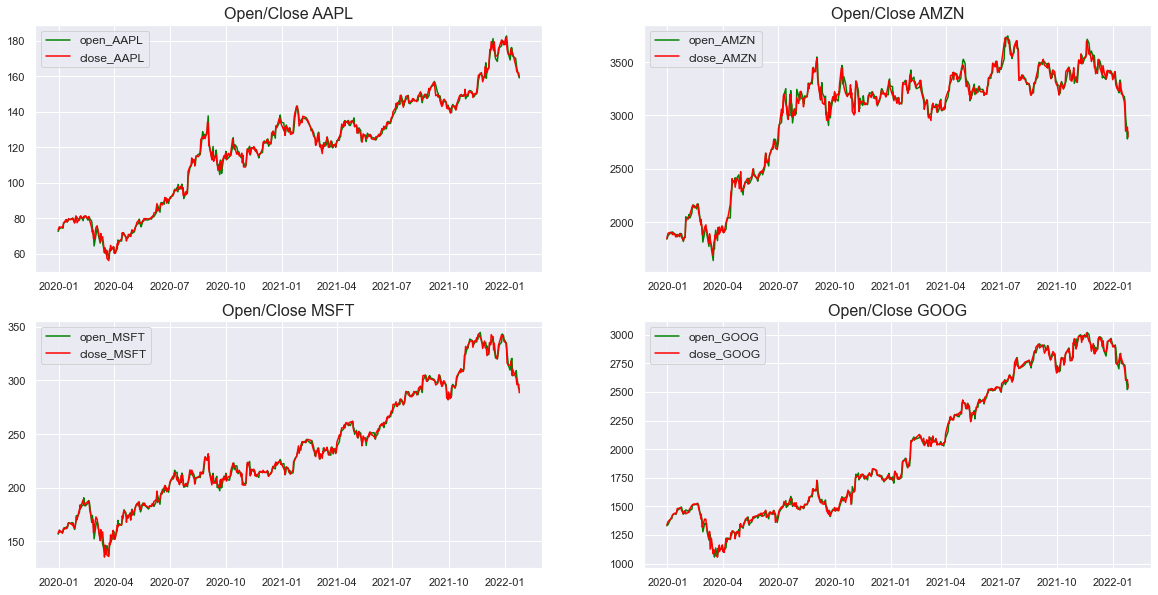

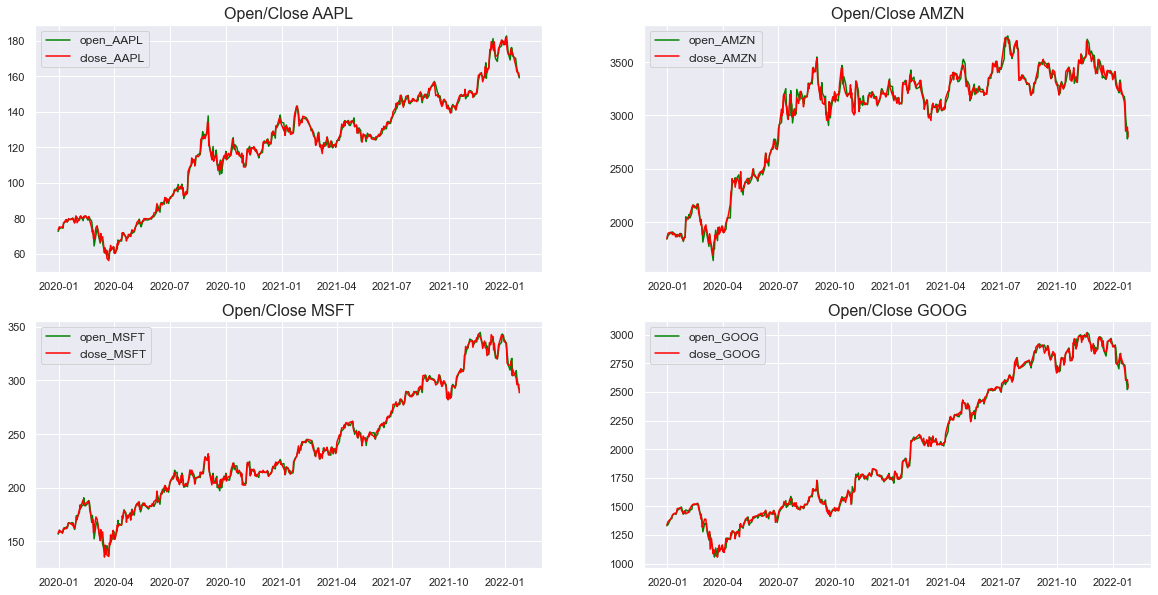

In [17]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes[0, 0].plot(df.index,df["AAPL"]["open"],color="green",label= "open_AAPL")
axes[0, 0].plot(df.index,df["AAPL"]["close"],color="red",label= "close_AAPL")
axes[0, 0].set_title("Open/Close AAPL",fontsize=16)
axes[0, 0].axes.legend(fontsize=12)

axes[0, 1].plot(df.index,df["AMZN"]["open"],color="green",label= "open_AMZN")
axes[0, 1].plot(df.index,df["AMZN"]["close"],color="red",label= "close_AMZN")
axes[0, 1].set_title("Open/Close AMZN",fontsize=16)
axes[0, 1].axes.legend(fontsize=12)

axes[1, 0].plot(df.index,df["MSFT"]["open"],color="green",label= "open_MSFT")
axes[1, 0].plot(df.index,df["MSFT"]["close"],color="red",label= "close_MSFT")
axes[1, 0].set_title("Open/Close MSFT",fontsize=16)
axes[1, 0].axes.legend(fontsize=12)


axes[1, 1].plot(df.index,df["GOOG"]["open"],color="green",label= "open_GOOG")
axes[1, 1].plot(df.index,df["GOOG"]["close"],color="red",label= "close_GOOG")
axes[1, 1].set_title("Open/Close GOOG",fontsize=16)
axes[1, 1].axes.legend(fontsize=12)

plt.show()

In [18]:
#Weekly average 
AAPL_open_resample = df['AAPL']['open'].resample("W").mean()  # resample to weekly average, to reduce the noise or granularity of the data
AAPL_close_resample = df['AAPL']['close'].resample("W").mean() 

AMZN_open_resample = df['AMZN']['open'].resample("W").mean()  # resample to weekly average, to reduce the noise or granularity of the data
AMZN_close_resample = df['AMZN']['close'].resample("W").mean() 

GOOG_open_resample = df['GOOG']['open'].resample("W").mean()  # resample to weekly average, to reduce the noise or granularity of the data
GOOG_close_resample = df['GOOG']['close'].resample("W").mean() 

MSFT_open_resample = df['MSFT']['open'].resample("W").mean()  # resample to weekly average, to reduce the noise or granularity of the data
MSFT_close_resample = df['MSFT']['close'].resample("W").mean()

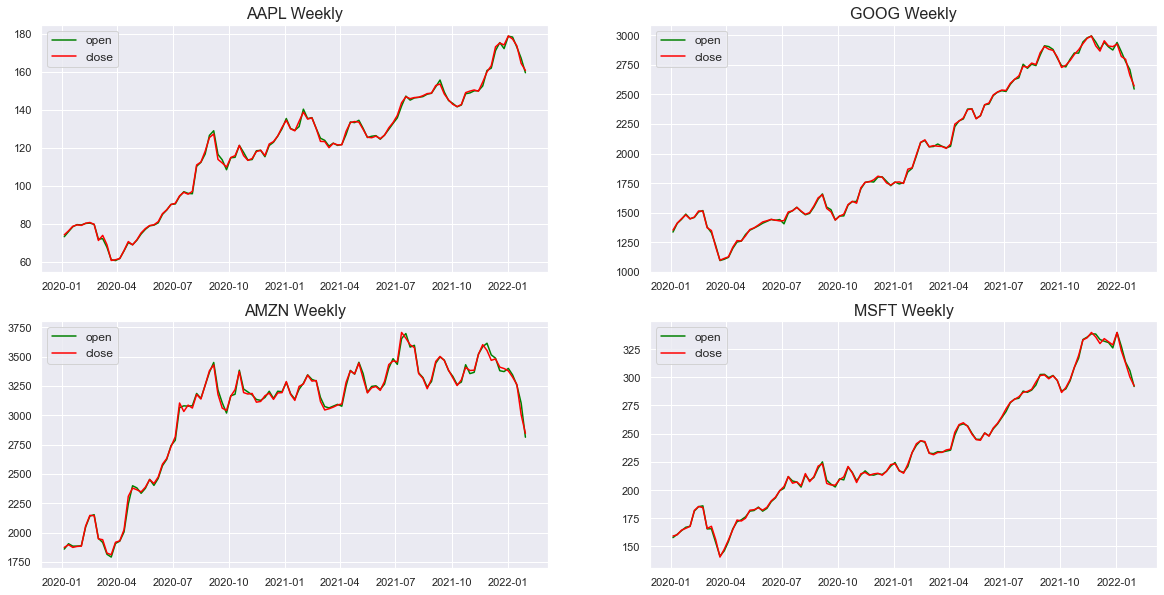

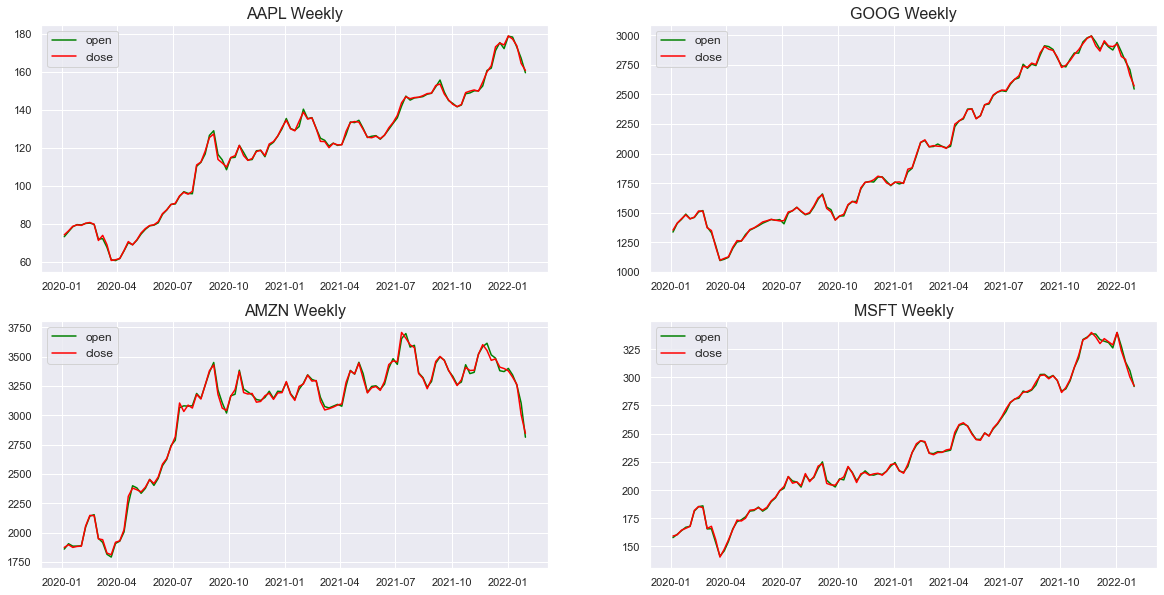

In [19]:
# using each subplot by its coordinates --zero-based index!
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

axes[0, 0].plot(AAPL_open_resample.index, AAPL_open_resample, color = 'green', label = 'open')
axes[0, 0].plot(AAPL_close_resample.index, AAPL_close_resample, color = 'red', label = 'close')
axes[0, 0].set_title("AAPL Weekly", fontsize=16)
axes[0, 0].legend(fontsize=12)


axes[1, 0].plot(AMZN_open_resample.index, AMZN_open_resample, color = 'green', label = 'open')
axes[1, 0].plot(AMZN_close_resample.index, AMZN_close_resample, color = 'red', label = 'close')
axes[1, 0].set_title("AMZN Weekly", fontsize=16)
axes[1, 0].legend(fontsize=12)


axes[0, 1].plot(GOOG_open_resample.index, GOOG_open_resample, color = 'green', label = 'open')
axes[0, 1].plot(GOOG_close_resample.index, GOOG_close_resample, color = 'red', label = 'close')
axes[0, 1].set_title("GOOG Weekly", fontsize=16)
axes[0, 1].legend(fontsize=12)


axes[1, 1].plot(MSFT_open_resample.index, MSFT_open_resample, color = 'green', label = 'open')
axes[1, 1].plot(MSFT_close_resample.index, MSFT_close_resample, color = 'red', label = 'close')
axes[1, 1].set_title("MSFT Weekly", fontsize=16)
axes[1, 1].legend(fontsize=12)

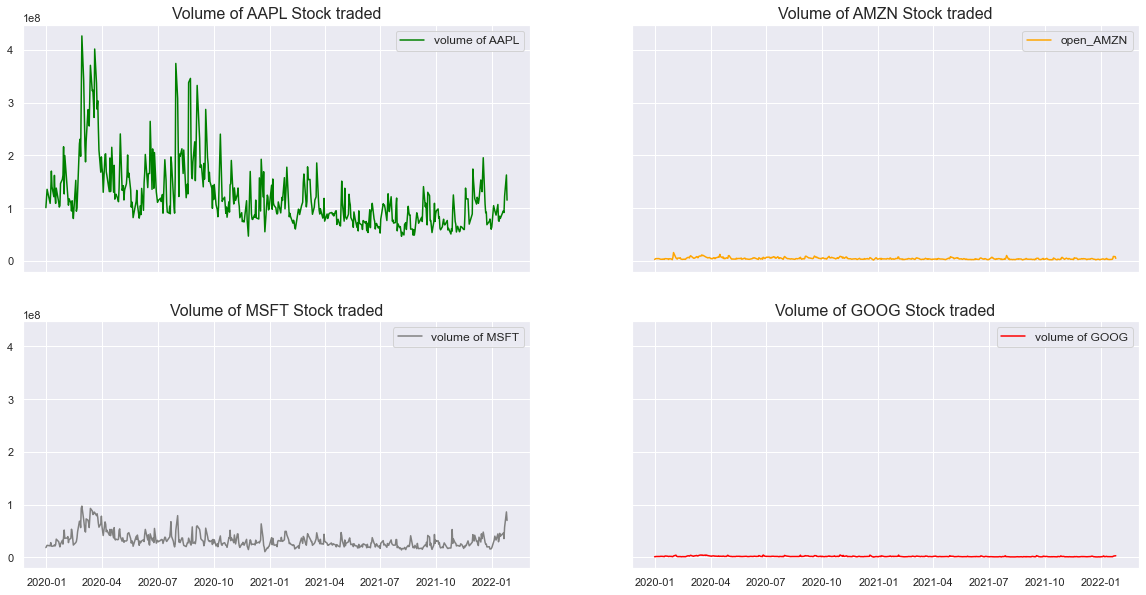

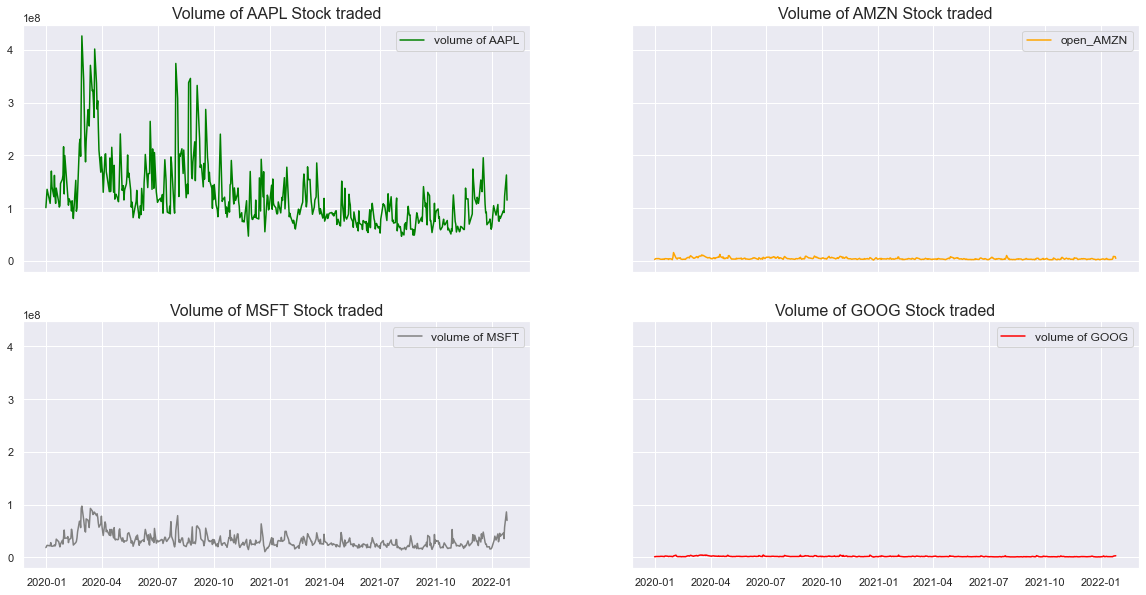

In [20]:
#Compared the volume traded of the stocks

fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10),sharex=True,sharey=True) #to keep the same axes dimension over the 4 plots 
axes[0, 0].plot(df.index,df["AAPL"]["volume"],color="green",label= "volume of AAPL")
axes[0, 0].set_title("Volume of AAPL Stock traded",fontsize=16)
axes[0, 0].axes.legend(fontsize=12)

axes[0, 1].plot(df.index,df["AMZN"]["volume"],color="orange",label= "open_AMZN")
axes[0, 1].set_title("Volume of AMZN Stock traded",fontsize=16)
axes[0, 1].axes.legend(fontsize=12)

axes[1, 0].plot(df.index,df["MSFT"]["volume"],color="grey",label= "volume of MSFT")
axes[1, 0].set_title("Volume of MSFT Stock traded",fontsize=16)
axes[1, 0].axes.legend(fontsize=12)


axes[1, 1].plot(df.index,df["GOOG"]["volume"],color="red",label= "volume of GOOG")
axes[1, 1].set_title("Volume of GOOG Stock traded",fontsize=16)
axes[1, 1].axes.legend(fontsize=12)

plt.show()

>The Graph shows the volume traded by these companies which clearly shows that stocks of Apple are traded way more compared to other stocks. To do it I used the same axes

## Question 3

Create a function that calculates the Return of Investment (ROI). Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it. The ROI formula is:



R O I equals fraction numerator F V I minus I V I over denominator I V I end fraction asterisk times 100

IVI: initial value of investment. This is the price at which you bought the stock
FVI: final value of investment. This is the price at which you sold the stock
ROI: Return of Investment. This is the percentage of increase in value of the investment
Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:

lookback: the number of days you hold the stock
name: the name of the stock, using the "Close" value of the stock
data: the dataframe with the stock data
Paste here the result of `roi(365, "GOOG", df)`.

In [21]:
def roi(lookback, name, data):
    return(100*(data[name]["close"]/data[name]["close"].shift(lookback)-1))

In [22]:
roi(365, "GOOG", df)

date
2019-12-31          NaN
2020-01-02          NaN
2020-01-07          NaN
2020-01-08          NaN
2020-01-09          NaN
                ...    
2022-01-19    88.662344
2022-01-20    82.298762
2022-01-21    73.954682
2022-01-24    75.563894
2022-01-25    69.432484
Name: close, Length: 488, dtype: float64

date
2019-12-31          NaN
2020-01-02          NaN
2020-01-07          NaN
2020-01-08          NaN
2020-01-09          NaN
                ...    
2022-01-19    88.662344
2022-01-20    82.298762
2022-01-21    73.954682
2022-01-24    75.563894
2022-01-25    69.432484
Name: close, Length: 488, dtype: float64

## Question 4

Apply the ROI function to the portfolio. Create as many ROI columns as different stocks you have in the portfolio and plot them, representing for each stock:

ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
ROI after holding the stock for 90 days (green, solid line) (0.5 points)
Attach here the ROI plots for AMZN.

In [23]:
df["AAPL", "roi 365"]=roi(365, "AAPL", df)
df["AAPL", "roi_ 80"]=roi(180, "AAPL", df)
df["AAPL", "roi 90"]=roi(90, "AAPL", df)


df["AMZN", "roi 365"]=roi(365, "AMZN", df)
df["AMZN", "roi 180"]=roi(180, "AMZN", df)
df["AMZN", "roi 90"]=roi(90, "AMZN", df)

df["MSFT", "roi 365"]=roi(365, "MSFT", df)
df["MSFT", "roi 180"]=roi(180, "MSFT", df)
df["MSFT", "roi 90"]=roi(90, "MSFT", df)

df["GOOG", "roi 365"]=roi(365, "GOOG", df)
df["GOOG", "roi 180"]=roi(180, "GOOG", df)
df["GOOG", "roi 90"]=roi(90, "GOOG", df)

In [24]:
#df
# df.insert instead or (b) do df[["A", "B"]] to reorder ? will find a way

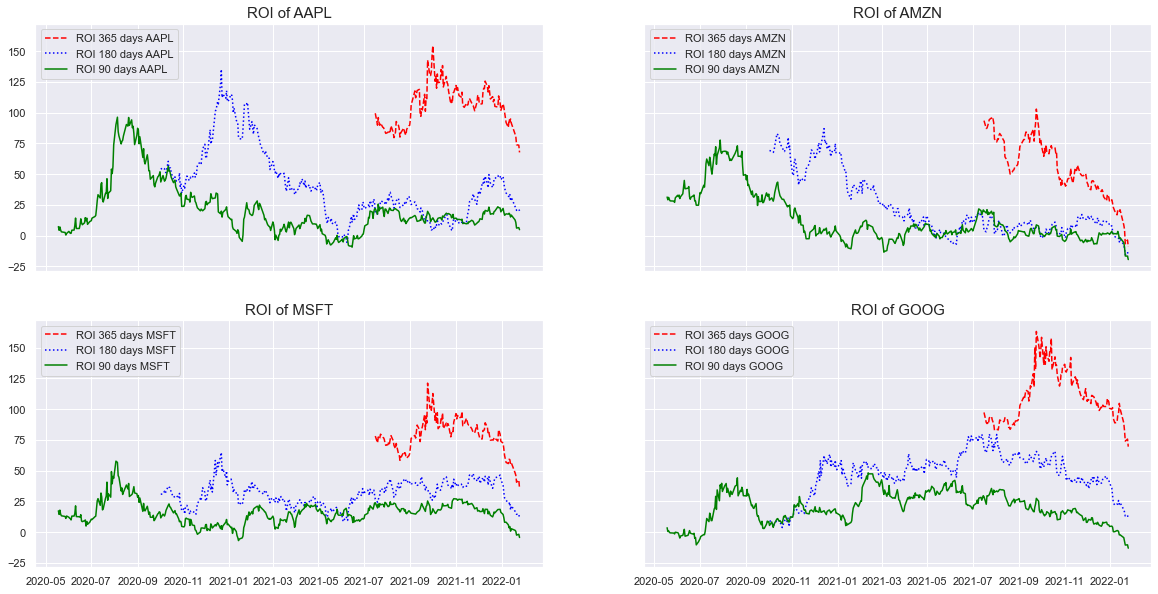

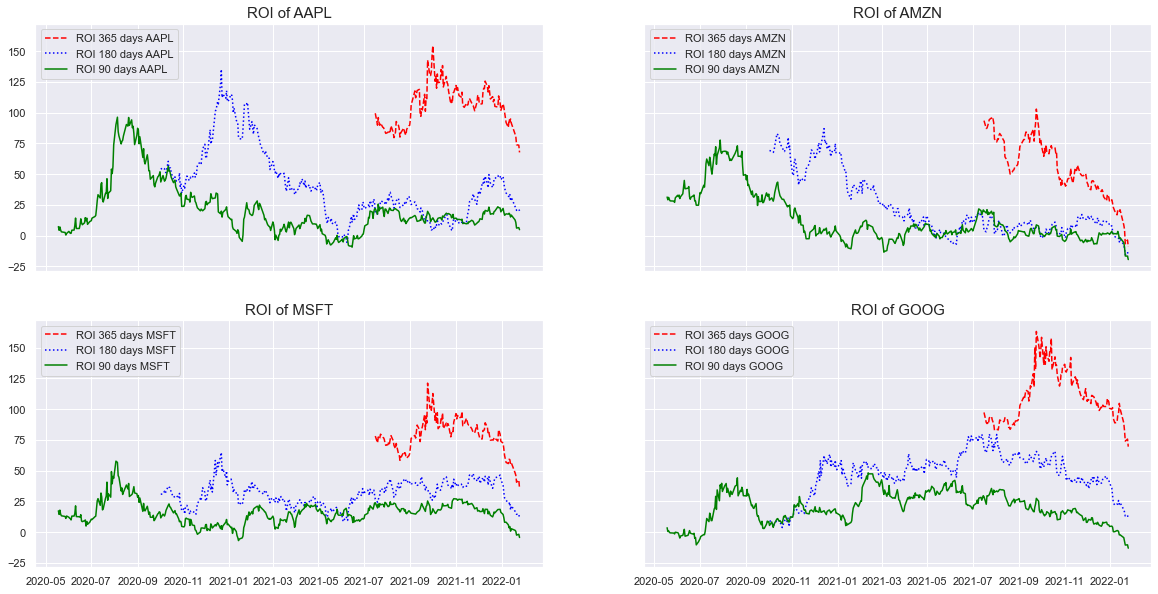

In [25]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True,sharey=True)

axes[0, 0].plot(df["AAPL", "roi 365"],color = 'red', linestyle = '--', label='ROI 365 days AAPL')
axes[0, 0].plot(df["AAPL", "roi_ 80"],color = 'blue', linestyle = ':', label= 'ROI 180 days AAPL')
axes[0, 0].plot(df["AAPL", "roi 90"],color = 'green', linestyle = '-', label= 'ROI 90 days AAPL')
axes[0, 0].set_title("ROI of AAPL", fontsize=15)
axes[0, 0].axes.legend(fontsize=11)
axes[0, 0].legend(loc= "upper left")

axes[0, 1].plot(df["AMZN", "roi 365"],color = 'red', linestyle = '--', label="ROI 365 days AMZN")
axes[0, 1].plot(df["AMZN", "roi 180"],color = 'blue', linestyle = ':', label= "ROI 180 days AMZN")
axes[0, 1].plot(df["AMZN", "roi 90"],color = 'green', linestyle = '-', label= "ROI 90 days AMZN")
axes[0, 1].set_title("ROI of AMZN",fontsize=15)
axes[0, 1].axes.legend(fontsize=11)
axes[0, 1].legend(loc= "upper left")

axes[1, 0].plot(df["MSFT", "roi 365"],color = 'red', linestyle = '--', label='ROI 365 days MSFT')
axes[1, 0].plot(df["MSFT", "roi 180"],color = 'blue', linestyle = ':', label= 'ROI 180 days MSFT')
axes[1, 0].plot(df["MSFT", "roi 90"],color = 'green', linestyle = '-', label= 'ROI 90 days MSFT')
axes[1, 0].set_title('ROI of MSFT',fontsize=15)
axes[1, 0].axes.legend(fontsize=11)
axes[1, 0].legend(loc= "upper left")

axes[1, 1].plot(df["GOOG", "roi 365"],color = 'red', linestyle = '--', label='ROI 365 days GOOG')
axes[1, 1].plot(df["GOOG", "roi 180"],color = 'blue', linestyle = ':', label= 'ROI 180 days GOOG')
axes[1, 1].plot(df["GOOG", "roi 90"],color = 'green', linestyle = '-', label= 'ROI 90 days GOOG')
axes[1, 1].set_title('ROI of GOOG',fontsize=15)
axes[1, 1].axes.legend(fontsize=11)
axes[1, 1].legend(loc= "upper left")

## Question 5

Given these two portfolios, which one has the best average ROI, with a lookback of 365 days? (Keep in mind that ROI is a percentage and you can't average it directly - you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period)



   Portfolio 1:

       AAPL 40%

       GOOG 30%

       MSFT 20%

       AMZN 10%



   Portfolio 2:

       AAPL 30%

       GOOG 20%

       MSFT 10%

       AMZN 40%



Paste here the average ROI of both portfolios (two numbers).

In [26]:
def ROI_numerical (lookback, name, data):
    IVI= data[f"{name}", "close"].shift(lookback)
    ROI=(data[f"{name}", "close"].pct_change(lookback))
    ROI_numerical=(ROI*IVI).mean()
    return ROI_numerical

In [27]:
def portfolio_optimization(AAPL, AMZN, MSFT, GOOG):
    optimized  = (ROI_numerical(365, "AAPL", df)*AAPL)+\
    (ROI_numerical(365, "AMZN", df)*AMZN)+\
    (ROI_numerical(365, "MSFT", df)*MSFT)+\
    (ROI_numerical(365, "GOOG", df)*GOOG)
    return optimized 

In [28]:
#porfolio 1
print ("average ROI of portfolio 1:", portfolio_optimization(0.4,0.1,0.2,0.3))

average ROI of portfolio 1: 617.6659917691859
average ROI of portfolio 1: 617.6659917691859


In [31]:
#porfolio 2
print ("average ROI of portfolio 2:", portfolio_optimization(0.3, 0.4, 0.1, 0.2))

average ROI of portfolio 2: 802.4752360243137
average ROI of portfolio 2: 802.4752360243137


> Portfolio 2 have best average ROI, with a lookback of 365 days compared to portfolio 1

## Question 6

Find a better combination in your portfolio. The new combination should beat the best portfolio that you found in the previous exercise.

In [ ]:
largest = 0 
optimal = []

for i in range(100_000): 
    o = list(np.round(np.random.dirichlet(np.ones(4))*1,0))
    best_portfolio = (portfolio_optimization(o[0], o[1], o[2], o[3]))/100
    port= int(best_portfolio)
    
    if port > largest:
        largest = port
        optimal = o
        
print("the highest for a period of 354 days is ", largest," with a weight is Apple, Amazon, Microsoft, and Google respectively of:",optimal)

In [ ]:
print ("average ROI of my best combinaison:", portfolio_optimization(0,0,0,1))

> The highest portfolio combinaison with a period of 354 days is 100% in Google. Since its the highest portfolio, this new combination beat portfolio 2. It was confirmed in the previous cell since its higher than 802